In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from sklearn.metrics import *

2.11.0


In [3]:
import os   
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Proyecto_IA2/Dataset_'

In [4]:
%cd /content/gdrive/MyDrive/Proyecto_IA2/Dataset_ 

/content/gdrive/MyDrive/Proyecto_IA2/Dataset_


In [ ]:
!ls

data  kaggle.json


In [ ]:
!kaggle datasets download -dsartajbhuvaji/brain-tumor-classification-mri

 93% 81.0M/86.8M [00:00<00:00, 172MB/s]
100% 86.8M/86.8M [00:00<00:00, 165MB/s]


In [ ]:
%cd /content/gdrive/MyDrive/Proyecto_IA2/Dataset2_ 

/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_


In [ ]:
!mkdir data
!mv brain-tumor-mri-dataset.zip data

mkdir: cannot create directory ‘data’: File exists
mv: cannot stat 'brain-tumor-mri-dataset.zip': No such file or directory


In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset


100% 148M/149M [00:00<00:00, 161MB/s]
100% 149M/149M [00:00<00:00, 176MB/s]


In [ ]:
!mkdir data
!mv brain-tumor-classification-mri.zip data

mkdir: cannot create directory ‘data’: File exists
mv: cannot stat 'brain-tumor-classification-mri.zip': No such file or directory


In [ ]:
%cd data

/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data


In [ ]:
!unzip brain-tumor-classification-mri.zip

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [ ]:
!unzip brain-tumor-mri-dataset.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: 

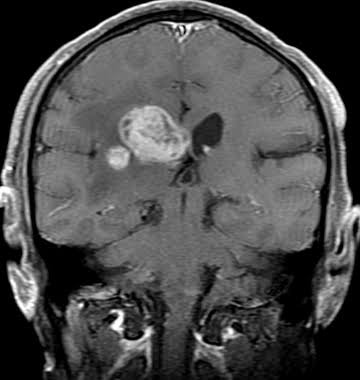

In [5]:
#IMAGEN DATASET1
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Testing/glioma_tumor/image(13).jpg')
cv2_imshow(img)


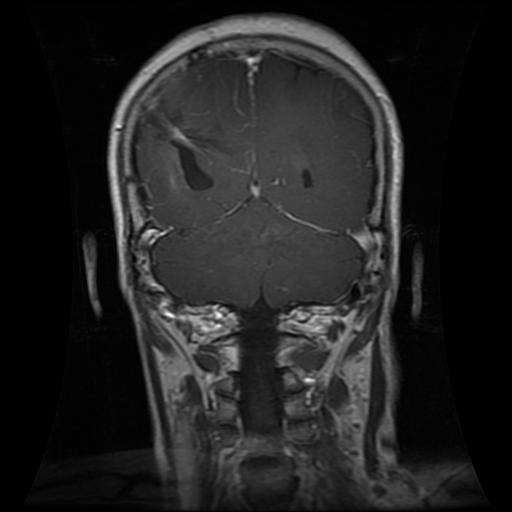

In [6]:
#IMAGEN DATASET2
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Training/glioma/Tr-gl_0023.jpg')
cv2_imshow(img)


In [7]:
image_size_a = 128 
image_size_b = 128

In [8]:
#CARGAMOS TRAIN
glioma = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Training/glioma_tumor"
images_glioma = []
for image in os.listdir(glioma):
  image = cv2.imread(os.path.join(glioma, image))  
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_glioma.append([image_resize]) 

In [9]:
meningioma = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Training/meningioma_tumor/"
images_meningioma = []
for image in os.listdir(meningioma):
  image = cv2.imread(os.path.join(meningioma, image))  
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_meningioma.append([image_resize]) 

In [10]:
no_tumor = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Training/no_tumor"
images_no_tumor = []
for image in os.listdir(no_tumor):
  image = cv2.imread(os.path.join(no_tumor, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_no_tumor.append([image_resize]) 

In [11]:
pituitary = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Training/pituitary_tumor"
images_pituitary = []
for image in os.listdir(pituitary):
  image = cv2.imread(os.path.join(pituitary, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_pituitary.append([image_resize]) 

In [12]:
#SEGUNDO DATA
glioma2 = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Training/glioma"
images_glioma2 = []
for image in os.listdir(glioma2):
  image = cv2.imread(os.path.join(glioma2, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_glioma2.append([image_resize]) 

In [13]:
meningioma2 = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Training/meningioma"
images_meningioma2 = []
for image in os.listdir(meningioma2):
  image = cv2.imread(os.path.join(meningioma2, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_meningioma2.append([image_resize]) 

In [14]:
no_tumor2 = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Training/notumor"
images_no_tumor2 = []
for image in os.listdir(no_tumor2):
  image = cv2.imread(os.path.join(no_tumor2, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_no_tumor2.append([image_resize]) 

In [15]:
pituitary2 = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Training/pituitary"
images_pituitary2 = []
for image in os.listdir(pituitary2):
  image = cv2.imread(os.path.join(pituitary2, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_pituitary2.append([image_resize]) 

In [16]:
images_glioma = np.array(images_glioma)
images_meningioma = np.array(images_meningioma)
images_no_tumor = np.array(images_no_tumor)
images_pituitary = np.array(images_pituitary)
images_glioma2 = np.array(images_glioma2)
images_meningioma2 = np.array(images_meningioma2)
images_no_tumor2 = np.array(images_no_tumor2)
images_pituitary2 = np.array(images_pituitary2)

In [17]:
#CARGAMOS TEST
glioma_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Testing/glioma_tumor"
images_glioma_test = []
for image in os.listdir(glioma_test):
  image = cv2.imread(os.path.join(glioma_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_glioma_test.append([image_resize])

In [18]:
meningioma_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Testing/meningioma_tumor"
images_meningioma_test = []
for image in os.listdir(meningioma_test):
  image = cv2.imread(os.path.join(meningioma_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_meningioma_test.append([image_resize]) 

In [19]:
no_tumor_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Testing/no_tumor"
images_no_tumor_test = []
for image in os.listdir(no_tumor_test):
  image = cv2.imread(os.path.join(no_tumor_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_no_tumor_test.append([image_resize]) 

In [20]:
pituitary_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/data/Testing/pituitary_tumor"
images_pituitary_test = []
for image in os.listdir(pituitary_test):
  image = cv2.imread(os.path.join(pituitary_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_pituitary_test.append([image_resize]) 

In [21]:
glioma2_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Testing/glioma"
images_glioma2_test = []
for image in os.listdir(glioma2_test):
  image = cv2.imread(os.path.join(glioma2_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_glioma2_test.append([image_resize]) 

In [22]:
meningioma2_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Testing/meningioma"
images_meningioma2_test = []
for image in os.listdir(meningioma2_test):
  image = cv2.imread(os.path.join(meningioma2_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_meningioma2_test.append([image_resize]) 

In [23]:
no_tumor2_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Testing/notumor"
images_no_tumor2_test = []
for image in os.listdir(no_tumor2_test):
  image = cv2.imread(os.path.join(no_tumor2_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_no_tumor2_test.append([image_resize]) 

In [24]:
pituitary2_test = "/content/gdrive/MyDrive/Proyecto_IA2/Dataset2_/data/Testing/pituitary"
images_pituitary2_test = []
for image in os.listdir(pituitary2_test):
  image = cv2.imread(os.path.join(pituitary2_test, image))
  image_resize = cv2.resize(image, (image_size_a, image_size_b))
  images_pituitary2_test.append([image_resize]) 

In [25]:
images_glioma_test = np.array(images_glioma_test)
images_meningioma_test = np.array(images_meningioma_test)
images_no_tumor_test = np.array(images_no_tumor_test)
images_pituitary_test = np.array(images_pituitary_test)
images_glioma2_test = np.array(images_glioma2_test)
images_meningioma2_test = np.array(images_meningioma2_test)
images_no_tumor2_test = np.array(images_no_tumor2_test)
images_pituitary2_test = np.array(images_pituitary2_test)

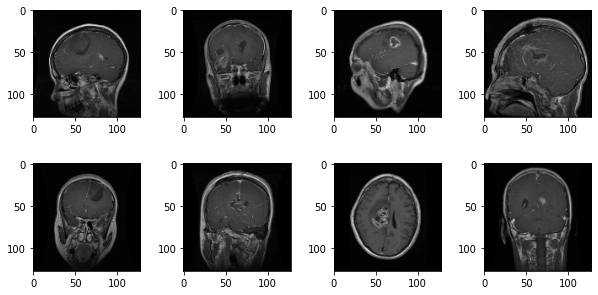

In [26]:
#VISUALIZAMOS IMAGENES DE ENTRENAMIENTO
plt.figure(1, figsize=(10,5))
n = 0
for i in range(8):
  n += 1
  r = np.random.randint(0, images_glioma.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_glioma[r[0]]))

plt.show()

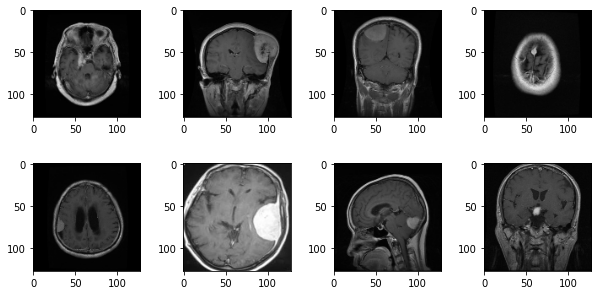

In [27]:
plt.figure(1, figsize=(10,5))
n = 0
for i in range(8):
  n += 1
  r = np.random.randint(0, images_meningioma.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_meningioma[r[0]]))

plt.show()

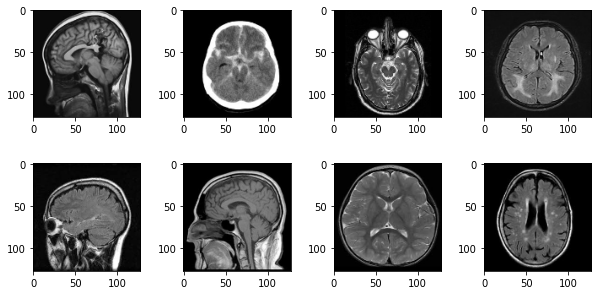

In [28]:
plt.figure(1, figsize=(10,5))
n = 0
images_no_tumor = np.array(images_no_tumor)
for i in range(8):
  n += 1
  r = np.random.randint(0, images_no_tumor.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_no_tumor[r[0]]))

plt.show()

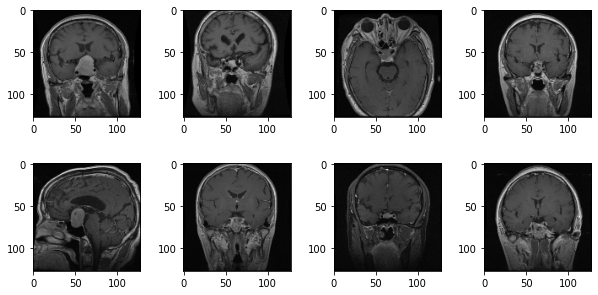

In [29]:
plt.figure(1, figsize=(10,5))
n = 0
for i in range(8):
  n += 1
  r = np.random.randint(0, images_pituitary.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_pituitary[r[0]]))

plt.show()

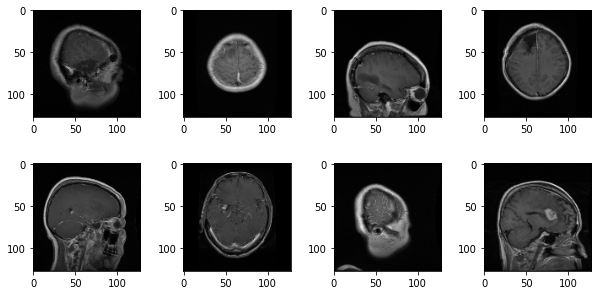

In [30]:
#SEGUNDO DATASET
plt.figure(1, figsize=(10,5))
n = 0
for i in range(8):
  n += 1
  r = np.random.randint(0, images_glioma2.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_glioma2[r[0]]))

plt.show()

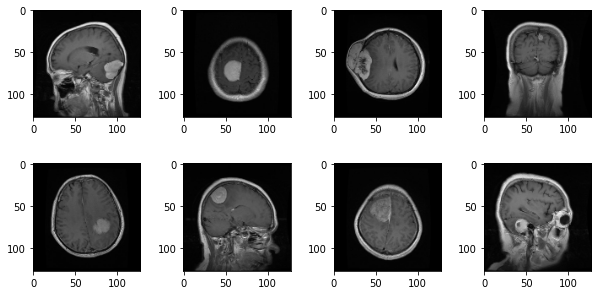

In [31]:
plt.figure(1, figsize=(10,5))
n = 0
for i in range(8):
  n += 1
  r = np.random.randint(0, images_meningioma2.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_meningioma2[r[0]]))

plt.show()

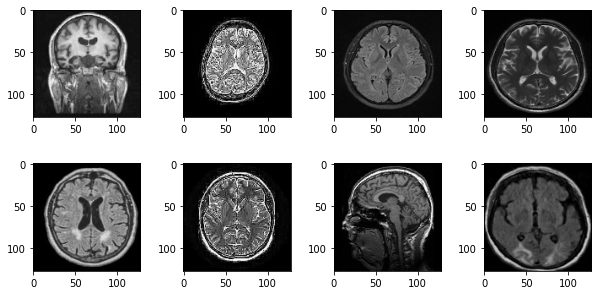

In [32]:
plt.figure(1, figsize=(10,5))
n = 0
images_no_tumor2 = np.array(images_no_tumor2)
for i in range(8):
  n += 1
  r = np.random.randint(0, images_no_tumor2.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_no_tumor2[r[0]]))

plt.show()

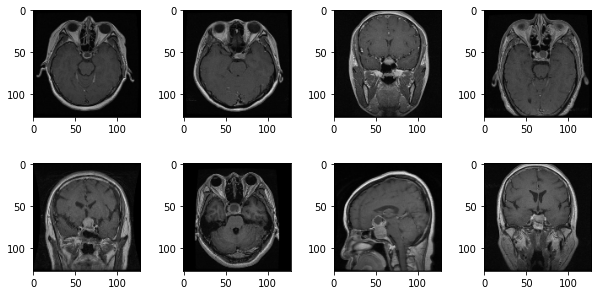

In [33]:
plt.figure(1, figsize=(10,5))
n = 0
for i in range(8):
  n += 1
  r = np.random.randint(0, images_pituitary2.shape[0], 1)
  plt.subplot(2, 4, n)
  plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
  plt.imshow(np.squeeze(images_pituitary2[r[0]]))

plt.show()

In [26]:
print(images_meningioma.shape, images_no_tumor.shape,images_glioma.shape ,images_pituitary.shape)
print(images_meningioma2.shape, images_no_tumor2.shape,images_glioma2.shape ,images_pituitary2.shape)

(822, 1, 128, 128, 3) (395, 1, 128, 128, 3) (826, 1, 128, 128, 3) (827, 1, 128, 128, 3)
(1339, 1, 128, 128, 3) (1595, 1, 128, 128, 3) (1321, 1, 128, 128, 3) (1457, 1, 128, 128, 3)


In [27]:
images_meningioma[:1]

array([[[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [2, 2, 2],
          [2, 2, 2],
          [2, 2, 2]],

         [[0, 0, 0],
          [0, 0, 0],
          [1, 1, 1],
          ...,
          [3, 3, 3],
          [3, 3, 3],
          [3, 3, 3]],

         ...,

         [[1, 1, 1],
          [1, 1, 1],
          [1, 1, 1],
          ...,
          [5, 5, 5],
          [3, 3, 3],
          [2, 2, 2]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [3, 3, 3],
          [2, 2, 2],
          [2, 2, 2]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [1, 1, 1],
          [0, 0, 0],
          [0, 0, 0]]]]], dtype=uint8)

In [28]:
x_train = np.concatenate((images_meningioma,images_no_tumor,images_glioma,images_pituitary,images_meningioma2,images_no_tumor2,images_glioma2,images_pituitary2),axis = 0)

In [29]:
x_train.shape

(8582, 1, 128, 128, 3)

In [30]:
images_glioma_resize = np.resize(images_glioma, (826, 49152))
images_meningioma_resize = np.resize(images_meningioma, (822, 49152))
images_no_tumor_resize = np.resize(images_no_tumor, (395, 49152))
images_pituitary_resize = np.resize(images_pituitary, (827, 49152))
#SEGUNDO DATASET
images_glioma_resize2 = np.resize(images_glioma2, (1321, 49152))
images_meningioma_resize2 = np.resize(images_meningioma2, (1339, 49152))
images_no_tumor_resize2 = np.resize(images_no_tumor2, (1595,49152))
images_pituitary_resize2 = np.resize(images_pituitary2, (1457,49152))

print(images_glioma_resize.shape)
print(images_meningioma_resize.shape)
print(images_no_tumor_resize.shape)
print(images_pituitary_resize.shape)
print(images_glioma_resize2.shape)
print(images_meningioma_resize2.shape)
print(images_no_tumor_resize2.shape)
print(images_pituitary_resize2.shape)

(826, 49152)
(822, 49152)
(395, 49152)
(827, 49152)
(1321, 49152)
(1339, 49152)
(1595, 49152)
(1457, 49152)


In [31]:
aux = images_meningioma_resize
baux =  pd.DataFrame(aux)
baux.head(10)

#3 CANALES RGB, LOS CANALES VAN DE 3 EN 3 QUE QUIERE DECIR ESTO QUE SI MIRAMOS EL ULTIMO PIXEL DEL NDARRAY Y LO MIRAMOS EN LOS ULTIMOS DATOS
# DE LA FILA SALEN 444 222 111 QUE CORRESPONDE A UN PIXEL

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#@title Definimos el conjunto de y para entrenar
#TRAIN DATASET1
images_meningioma_resize = pd.DataFrame(images_meningioma_resize)
images_no_tumor_resize = pd.DataFrame(images_no_tumor_resize)
images_glioma_resize = pd.DataFrame(images_glioma_resize)
images_pituitary_resize = pd.DataFrame(images_pituitary_resize)

#TRAIN DATASET2
images_meningioma_resize2 = pd.DataFrame(images_meningioma_resize2)
images_no_tumor_resize2 = pd.DataFrame(images_no_tumor_resize2)
images_glioma_resize2 = pd.DataFrame(images_glioma_resize2)
images_pituitary_resize2 = pd.DataFrame(images_pituitary_resize2)


# 0 -> Glioma
# 1 -> Meningioma
# 2 -> No tumor
# 3 -> Pituitario


images_glioma_resize2['label'] = 0
images_meningioma_resize2['label'] = 1
images_no_tumor_resize2['label'] = 2
images_pituitary_resize2['label'] = 3

images_glioma_resize['label'] = 0
images_meningioma_resize['label'] = 1
images_no_tumor_resize['label'] = 2
images_pituitary_resize['label'] = 3

Datas_train = images_meningioma_resize
Datas_train = Datas_train.append(images_no_tumor_resize, ignore_index = True)
Datas_train = Datas_train.append(images_glioma_resize, ignore_index = True)
Datas_train = Datas_train.append(images_pituitary_resize, ignore_index = True)
Datas_train = Datas_train.append(images_meningioma_resize2, ignore_index = True)
Datas_train = Datas_train.append(images_no_tumor_resize2, ignore_index = True)
Datas_train = Datas_train.append(images_glioma_resize2, ignore_index = True)
Datas_train = Datas_train.append(images_pituitary_resize2, ignore_index = True)


print(Datas_train.shape)
Dataframe = pd.DataFrame(Datas_train)

(8582, 49153)


In [33]:
Dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
y_train = Dataframe[Dataframe.columns[-1]]
y_train = y_train.to_numpy()

In [35]:
print(np.unique(y_train))

[0 1 2 3]


In [36]:
x_train.shape

(8582, 1, 128, 128, 3)

In [37]:
#CREAMOS EL CONJUNTO DE TESTEO
print(images_glioma_test.shape, images_meningioma_test.shape,images_no_tumor_test.shape ,images_pituitary_test.shape)
print(images_glioma2_test.shape, images_meningioma2_test.shape,images_no_tumor2_test.shape ,images_pituitary2_test.shape)



(100, 1, 128, 128, 3) (115, 1, 128, 128, 3) (105, 1, 128, 128, 3) (74, 1, 128, 128, 3)
(300, 1, 128, 128, 3) (306, 1, 128, 128, 3) (405, 1, 128, 128, 3) (300, 1, 128, 128, 3)


In [38]:
images_no_tumor_test[:1]

array([[[[[19, 19, 19],
          [19, 19, 19],
          [19, 19, 19],
          ...,
          [19, 19, 19],
          [19, 19, 19],
          [19, 19, 19]],

         [[19, 19, 19],
          [19, 19, 19],
          [19, 19, 19],
          ...,
          [19, 19, 19],
          [19, 19, 19],
          [19, 19, 19]],

         [[19, 19, 19],
          [19, 19, 19],
          [19, 19, 19],
          ...,
          [19, 19, 19],
          [19, 19, 19],
          [19, 19, 19]],

         ...,

         [[19, 19, 19],
          [19, 19, 19],
          [19, 19, 19],
          ...,
          [19, 19, 19],
          [19, 19, 19],
          [19, 19, 19]],

         [[19, 19, 19],
          [19, 19, 19],
          [19, 19, 19],
          ...,
          [19, 19, 19],
          [19, 19, 19],
          [19, 19, 19]],

         [[19, 19, 19],
          [19, 19, 19],
          [19, 19, 19],
          ...,
          [19, 19, 19],
          [19, 19, 19],
          [19, 19, 19]]]]], dtype=uint8)

In [39]:
x_test = np.concatenate((images_meningioma_test,images_no_tumor_test,images_glioma_test,images_pituitary_test,images_meningioma2_test,
                         images_no_tumor2_test,images_glioma2_test,images_pituitary2_test),axis = 0)

In [40]:
images_glioma_resize_test = np.resize(images_glioma_test, (100, 49152))
images_meningioma_resize_test = np.resize(images_meningioma_test, (115, 49152))
images_no_tumor_resize_test = np.resize(images_no_tumor_test, (105, 49152))
images_pituitary_resize_test = np.resize(images_pituitary_test, (74, 49152))
#SEGUNDO DATASET
images_glioma_resize2_test = np.resize(images_glioma2_test, (300, 49152))
images_meningioma_resize2_test = np.resize(images_meningioma2_test, (306, 49152))
images_no_tumor_resize2_test = np.resize(images_no_tumor2_test, (405, 49152))
images_pituitary_resize2_test = np.resize(images_pituitary2_test, (300, 49152))

In [41]:
#TEST DATASET
images_glioma_resize_test = pd.DataFrame(images_glioma_resize_test)
images_meningioma_resize_test = pd.DataFrame(images_meningioma_resize_test)
images_no_tumor_resize_test = pd.DataFrame(images_no_tumor_resize_test)
images_pituitary_resize_test = pd.DataFrame(images_pituitary_resize_test)

#TEST DATASET2
images_glioma_resize2_test = pd.DataFrame(images_glioma_resize2_test)
images_meningioma_resize2_test = pd.DataFrame(images_meningioma_resize2_test)
images_no_tumor_resize2_test = pd.DataFrame(images_no_tumor_resize2_test)
images_pituitary_resize2_test = pd.DataFrame(images_pituitary_resize2_test)


# 0 -> Glioma
# 1 -> Meningioma
# 2 -> No tumor
# 3 -> Pituitario


images_glioma_resize2_test['label'] = 0
images_meningioma_resize2_test['label'] = 1
images_no_tumor_resize2_test['label'] = 2
images_pituitary_resize2_test['label'] = 3

images_glioma_resize_test['label'] = 0
images_meningioma_resize_test['label'] = 1
images_no_tumor_resize_test['label'] = 2
images_pituitary_resize_test['label'] = 3

Datas_test = images_meningioma_resize_test
Datas_test = Datas_test.append(images_no_tumor_resize_test, ignore_index = True)
Datas_test = Datas_test.append(images_glioma_resize_test, ignore_index = True)
Datas_test = Datas_test.append(images_pituitary_resize_test, ignore_index = True)
Datas_test = Datas_test.append(images_meningioma_resize2_test, ignore_index = True)
Datas_test = Datas_test.append(images_no_tumor_resize2_test, ignore_index = True)
Datas_test = Datas_test.append(images_glioma_resize2_test, ignore_index = True)
Datas_test = Datas_test.append(images_pituitary_resize2_test, ignore_index = True)


print(Datas_test.shape)
Dataframe_test = pd.DataFrame(Datas_test)

(1705, 49153)


In [42]:
Dataframe_test.tail()

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
1700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1701,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1704,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3


In [43]:
y_test = Dataframe_test[Dataframe_test.columns[-1]]
y_test = y_test.to_numpy()

In [44]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8582, 1, 128, 128, 3) (8582,) (1705, 1, 128, 128, 3) (1705,)


In [45]:
x_train = np.reshape(x_train, (8582, 128, 128, 3)) 
x_test = np.reshape(x_test, (1705,128,128, 3)) 


In [46]:
x_train[:1]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [1, 1, 1],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],

        ...,

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [5, 5, 5],
         [3, 3, 3],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [3, 3, 3],
         [2, 2, 2],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [0, 0, 0]]]], dtype=uint8)

In [47]:
y_train = pd.DataFrame(y_train)



In [48]:
a = x_train.shape[0]
a

8582

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)  # ONE HOT ENCODING

x_train /= 255
x_test /= 255

In [ ]:
#@title DNN

model_DNN = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[128,128,3]),
                             tf.keras.layers.Dense(64, activation='relu',kernel_initializer='glorot_uniform', bias_initializer='he_uniform'),
                             tf.keras.layers.Dense(64, activation='relu',kernel_initializer='glorot_uniform', bias_initializer='he_uniform'),
                             tf.keras.layers.Dense(64, activation='relu',kernel_initializer='glorot_uniform', bias_initializer='he_uniform'),
                             tf.keras.layers.Dense(64, activation='relu',kernel_initializer='glorot_uniform', bias_initializer='he_uniform'),
                             tf.keras.layers.Dense(4,activation='softmax',kernel_initializer='glorot_uniform', bias_initializer='he_uniform'),
                             ])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
model_DNN.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#@title Model summary
model_DNN.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 3,158,532
Trainable params: 3,158,532
Non-

In [ ]:
auxxxxx = np.array(y_train)
auxxxxx

array([2, 1, 2, ..., 3, 3, 0])

In [ ]:
#@title Entrenamiento
iterations = 20
history = model_DNN.fit(x_train, y_train, epochs=iterations,  validation_split = 0.2, batch_size=64)

Epoch 1/20
108/108 [==============================] - 3s 15ms/step - loss: 1.2218 - accuracy: 0.4889 - val_loss: 1.3928 - val_accuracy: 0.3209
Epoch 2/20
108/108 [==============================] - 1s 10ms/step - loss: 0.9675 - accuracy: 0.6463 - val_loss: 1.1288 - val_accuracy: 0.6086
Epoch 3/20
108/108 [==============================] - 1s 10ms/step - loss: 0.8610 - accuracy: 0.6935 - val_loss: 1.1640 - val_accuracy: 0.5556
Epoch 4/20
108/108 [==============================] - 1s 10ms/step - loss: 0.7933 - accuracy: 0.7231 - val_loss: 0.8971 - val_accuracy: 0.7158
Epoch 5/20
108/108 [==============================] - 1s 12ms/step - loss: 0.7428 - accuracy: 0.7429 - val_loss: 0.9535 - val_accuracy: 0.6919
Epoch 6/20
108/108 [==============================] - 1s 10ms/step - loss: 0.6963 - accuracy: 0.7604 - val_loss: 0.9892 - val_accuracy: 0.6773
Epoch 7/20
108/108 [==============================] - 1s 10ms/step - loss: 0.6583 - accuracy: 0.7780 - val_loss: 0.8009 - val_accuracy: 0.7717

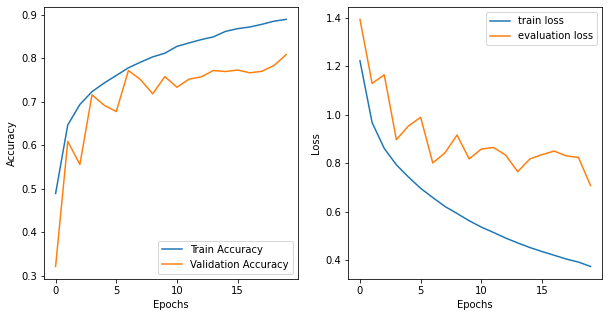

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
a = y_test.T

54/54 [==============================] - 0s 3ms/step
[0.12583646 0.05111318 0.7840126  0.03903774]
valor predicho: 2 max prob:  0.7840126 ground truth:  [0. 0. 1. 0.]


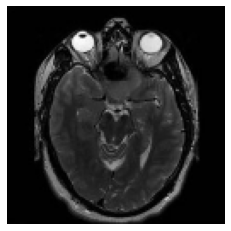

In [ ]:
from numpy.random.mtrand import randint
#@title **code** Usando el modeo para predecir
image_index = randint(1,1711)
predictions = model_DNN.predict(x_test)
print(predictions[image_index])
plt.imshow(x_test[image_index],cmap='Greys')
plt.axis('off')
print("valor predicho:",  np.argmax(predictions[image_index]), "max prob: ", np.max(predictions[image_index]),
      "ground truth: ", y_test[image_index] )
# ESTA EN ONE HOT ENCODING

#[1 0 0 0] ES 0
#[0 1 0 0] ES 1
#[0 0 1 0] ES 2
#[0 0 0 1] ES 3
# 0 -> Glioma
# 1 -> Meningioma
# 2 -> No tumor
# 3 -> Pituitario

In [ ]:
#@title CNN
model_CNN = tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='he_uniform', padding='same', input_shape=[128,128,3]))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='he_uniform', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Dropout(0.2))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_CNN.add(tf.keras.layers.BatchNormalization())
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Dropout(0.2))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_CNN.add(tf.keras.layers.Dropout(0.2))
model_CNN.add(tf.keras.layers.Dense(4, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#@title MODEL CNN SUMMARY
model_CNN.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
#@title Entrenamos la CNN
iterations = 20
history = model_CNN.fit(x_train, y_train, epochs=iterations,  validation_split = 0.2, batch_size=64)

Epoch 1/20
108/108 [==============================] - 23s 165ms/step - loss: 0.8393 - accuracy: 0.6724 - val_loss: 0.4862 - val_accuracy: 0.8486
Epoch 2/20
108/108 [==============================] - 15s 140ms/step - loss: 0.4553 - accuracy: 0.8109 - val_loss: 0.2508 - val_accuracy: 0.9528
Epoch 3/20
108/108 [==============================] - 15s 142ms/step - loss: 0.3353 - accuracy: 0.8660 - val_loss: 0.1901 - val_accuracy: 0.9313
Epoch 4/20
108/108 [==============================] - 15s 143ms/step - loss: 0.2696 - accuracy: 0.8995 - val_loss: 0.4966 - val_accuracy: 0.8119
Epoch 5/20
108/108 [==============================] - 16s 149ms/step - loss: 0.2039 - accuracy: 0.9232 - val_loss: 1.0222 - val_accuracy: 0.7740
Epoch 6/20
108/108 [==============================] - 16s 146ms/step - loss: 0.1697 - accuracy: 0.9374 - val_loss: 0.8081 - val_accuracy: 0.8055
Epoch 7/20
108/108 [==============================] - 16s 148ms/step - loss: 0.1340 - accuracy: 0.9525 - val_loss: 0.8660 - val_ac

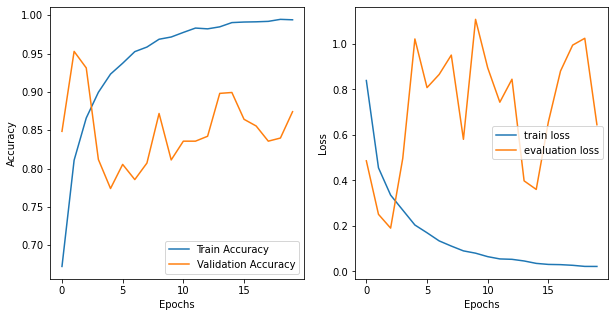

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

54/54 [==============================] - 2s 20ms/step
[9.9995637e-01 4.3019190e-05 1.0595418e-08 6.0714359e-07]
valor predicho: 0 max prob:  0.99995637 ground truth:  [1. 0. 0. 0.]


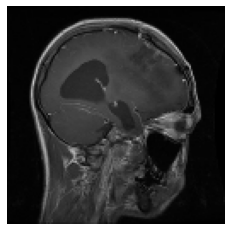

In [ ]:
from numpy.random.mtrand import randint
image_index = randint(1,1711)
predictions = model_CNN.predict(x_test)
print(predictions[image_index])
plt.imshow(x_test[image_index],cmap='Greys')
plt.axis('off')
print("valor predicho:",  np.argmax(predictions[image_index]), "max prob: ", np.max(predictions[image_index]),
      "ground truth: ", y_test[image_index] )
# ESTA EN ONE HOT ENCODING

#[1 0 0 0] ES 0
#[0 1 0 0] ES 1
#[0 0 1 0] ES 2
#[0 0 0 1] ES 3
# 0 -> Glioma
# 1 -> Meningioma
# 2 -> No tumor
# 3 -> Pituitario

In [ ]:
#@title Mirando entre capas
layer_outputs = [layer.output for layer in model_CNN.layers ]
layer_outputs

[<KerasTensor: shape=(None, 128, 128, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 128, 128, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 128, 128, 64) dtype=float32 (created by layer 'batch_normalization')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'batch_normalization_1')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'batch_normalization_2')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'batch_normalization_3'

1/1 [==============================] - 0s 323ms/step


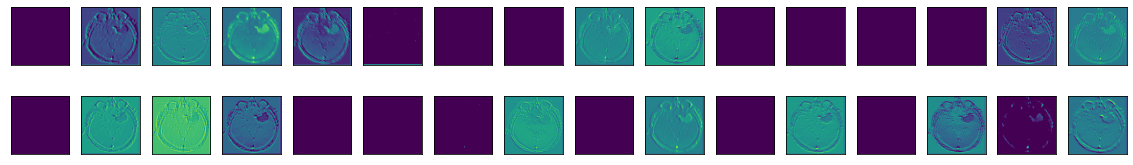

In [ ]:
x = 1
activation_model = tf.keras.models.Model(inputs=model_CNN.input, outputs=layer_outputs)
array = np.expand_dims(x_test[1], axis=0)
activations = activation_model.predict(array)
plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[x][0,:, :, i], cmap='viridis')


In [50]:
#@title Transfer Learning
model_A =  tf.keras.applications.InceptionV3(input_shape=x_train[0].shape, weights=None, include_top=False)
model_A.trainable = False
model_A.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [51]:
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [52]:
#LA UNION DE LA INCEVTIPNV3 CON OTRAS CAPAS PARA ADECUARLA A MI PROBLEMA
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [53]:
model_A.trainable = True
print("Total ayers of InceptionV3: ", len(model_A.layers))
for layer in model_A.layers[:250]:
  layer.trainable =  False

Total ayers of InceptionV3:  311


In [59]:
opt = tf.keras.optimizers.Adam(learning_rate=0.000002)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(x_train, y_train, epochs=10, batch_size=64, validation_split = 0.2)

Epoch 1/10
108/108 [==============================] - 26s 115ms/step - loss: 1.1757 - accuracy: 0.5037 - val_loss: 1.4081 - val_accuracy: 0.0000e+00
Epoch 2/10
108/108 [==============================] - 7s 66ms/step - loss: 0.9237 - accuracy: 0.6552 - val_loss: 1.4875 - val_accuracy: 0.1514
Epoch 3/10
108/108 [==============================] - 7s 67ms/step - loss: 0.8138 - accuracy: 0.7001 - val_loss: 1.5325 - val_accuracy: 0.1514
Epoch 4/10
108/108 [==============================] - 7s 67ms/step - loss: 0.7312 - accuracy: 0.7288 - val_loss: 1.4927 - val_accuracy: 0.0786
Epoch 5/10
108/108 [==============================] - 7s 67ms/step - loss: 0.6681 - accuracy: 0.7479 - val_loss: 1.3845 - val_accuracy: 0.0023
Epoch 6/10
108/108 [==============================] - 7s 67ms/step - loss: 0.6237 - accuracy: 0.7643 - val_loss: 1.2294 - val_accuracy: 0.3471
Epoch 7/10
108/108 [==============================] - 7s 68ms/step - loss: 0.5879 - accuracy: 0.7755 - val_loss: 0.8940 - val_accuracy: 

In [54]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [55]:
embedding_layer_1 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(0.01))
embedding_layer_2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(0.01))
embedding_layer_3 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(0.01))
embedding_layer_4 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(0.01))
#embedding_layer_5 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(0.01))
#embedding_layer_6= tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(0.01))
embedding_layer_p = tf.keras.layers.Dense(4, activation='softmax')

In [56]:
transfer_model = tf.keras.Sequential(model_B_on_A.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_3)
transfer_model.add(embedding_layer_4)
#transfer_model.add(embedding_layer_5)
#transfer_model.add(embedding_layer_6)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 64)                131136    
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                      

45

In [57]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = transfer_model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split = 0.15)

Epoch 1/30
114/114 [==============================] - 35s 111ms/step - loss: 41.6736 - accuracy: 0.7013 - val_loss: 35.6180 - val_accuracy: 0.0000e+00
Epoch 2/30
114/114 [==============================] - 8s 67ms/step - loss: 28.6634 - accuracy: 0.7985 - val_loss: 24.9135 - val_accuracy: 0.0000e+00
Epoch 3/30
114/114 [==============================] - 8s 66ms/step - loss: 19.0063 - accuracy: 0.8497 - val_loss: 17.3578 - val_accuracy: 0.0000e+00
Epoch 4/30
114/114 [==============================] - 7s 63ms/step - loss: 12.5870 - accuracy: 0.8794 - val_loss: 12.6228 - val_accuracy: 0.0000e+00
Epoch 5/30
114/114 [==============================] - 8s 70ms/step - loss: 9.3370 - accuracy: 0.8980 - val_loss: 10.7990 - val_accuracy: 0.0000e+00
Epoch 6/30
114/114 [==============================] - 8s 67ms/step - loss: 8.0850 - accuracy: 0.9101 - val_loss: 8.8463 - val_accuracy: 0.3960
Epoch 7/30
114/114 [==============================] - 8s 71ms/step - loss: 7.1329 - accuracy: 0.9160 - val_loss

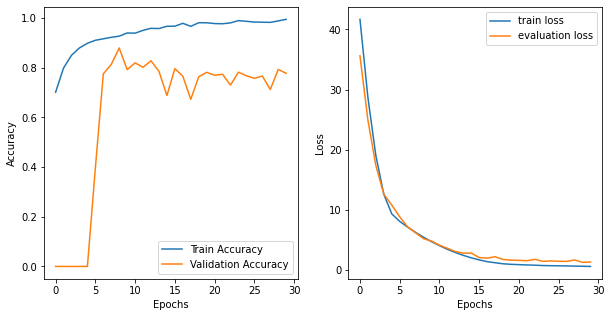

In [58]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
np.save("x_train.npy", x_train)

### PROBAMOS UNA ARQUITECTURA ENCODER-DECODER


In [ ]:
input_img = tf.keras.layers.Input(shape=(128, 128, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

In [ ]:

x_train2 = np.load("/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/x_train.npy")
x_test2 = np.load("/content/gdrive/MyDrive/Proyecto_IA2/Dataset_/x_test.npy")

In [ ]:
x_train2 = (x_train2 - np.mean(x_train2, axis=0)) / np.std(x_train2, axis=0)
x_test2 = (x_test2 - np.mean(x_test2, axis=0)) / np.std(x_test2, axis=0)


In [ ]:
opt = tf.optimizers.Adam(learning_rate = 0.001)
autoencoder.compile(optimizer=opt, loss='categorical_crossentropy')
autoencoder.fit(x_train2, x_train2, epochs=10,
                batch_size=64, shuffle=True,
                validation_data=(x_test2, x_test2))

Epoch 1/10
135/135 [==============================] - 19s 58ms/step - loss: -26312.0723 - val_loss: -307333.6250
Epoch 2/10
135/135 [==============================] - 6s 42ms/step - loss: -15984979.0000 - val_loss: -81147088.0000
Epoch 3/10
135/135 [==============================] - 6s 45ms/step - loss: -437784896.0000 - val_loss: -1391309568.0000
Epoch 4/10
135/135 [==============================] - 6s 42ms/step - loss: -3610077696.0000 - val_loss: -7833460736.0000
Epoch 5/10
135/135 [==============================] - 6s 44ms/step - loss: -14825622528.0000 - val_loss: -29696389120.0000
Epoch 6/10
135/135 [==============================] - 6s 42ms/step - loss: -44058238976.0000 - val_loss: -76545761280.0000
Epoch 7/10
135/135 [==============================] - 6s 42ms/step - loss: -113183490048.0000 - val_loss: -168118894592.0000
Epoch 8/10
135/135 [==============================] - 6s 44ms/step - loss: -235351212032.0000 - val_loss: -348865069056.0000
Epoch 9/10
135/135 [=============

In [ ]:
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test2)
predicted = autoencoder.predict(x_test2)
predicted.shape

54/54 [==============================] - 1s 8ms/step


(1705, 128, 128, 3)

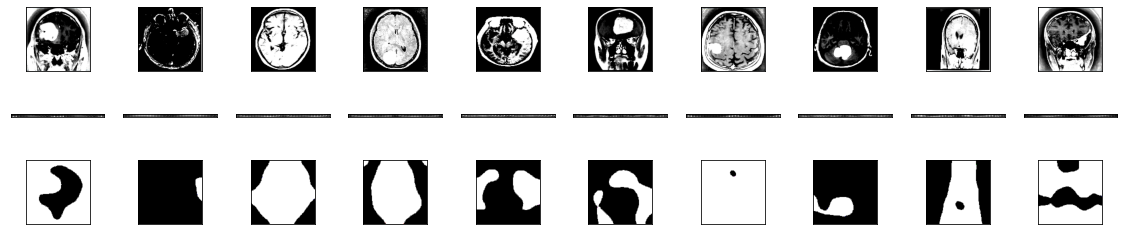

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test2[i].reshape(128, 128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,256))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(128, 128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)